In [1]:
import pandas as pd

data = {
    'Function Name': ['addPatient', 'updateMedicalHistory'],
    'Calls': [6, 1],
    'Min Gas': [116235, None],
    'Max Gas': [116439, None],
    'Avg Gas': [116311, 30251],
    'Deployment Gas': [None, None]
}

df = pd.DataFrame(data)

In [2]:
df.fillna(0, inplace=True)

C:\Users\Sharanzz\AppData\Local\Temp\ipykernel_32732\4231983114.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(0, inplace=True)


In [3]:
df = pd.get_dummies(df, columns=['Function Name'])

In [4]:
X = df[['Calls', 'Min Gas', 'Max Gas', 'Function Name_addPatient', 'Function Name_updateMedicalHistory']]
y = df['Avg Gas']


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [7]:
y_pred = model.predict(X_test)


In [10]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)  # For RMSE

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 86060.0
RMSE: 86060.0


In [11]:
new_data = pd.DataFrame({
    'Calls': [3],
    'Min Gas': [116200],
    'Max Gas': [116450],
    'Function Name_addPatient': [1],
    'Function Name_updateMedicalHistory': [0]
})

prediction = model.predict(new_data)
print(f'Predicted Avg Gas Usage: {prediction}')


Predicted Avg Gas Usage: [116311.]


In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming test_data['gas'] contains the actual gas values
# y_test_gas = test_data['gas']

# predicted_gas is the predicted values from the model
predicted_gas = model.predict(X_test)

# Calculate MAE for gas
mae_gas = mean_absolute_error(y_test, predicted_gas)

# Calculate RMSE for gas
rmse_gas = np.sqrt(mean_squared_error(y_test, predicted_gas))

# Print the results
print(f"MAE (Gas): {mae_gas}")
print(f"RMSE (Gas): {rmse_gas}")


MAE (Gas): 86060.0
RMSE (Gas): 86060.0


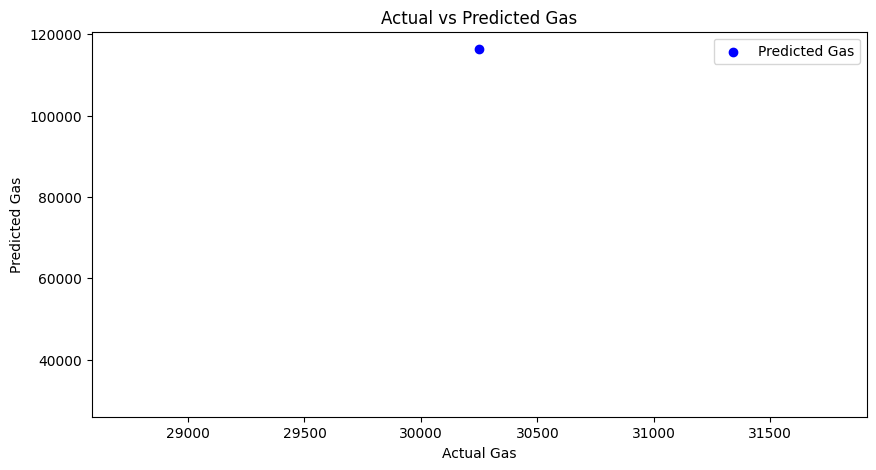

In [28]:
import matplotlib.pyplot as plt

# Assuming you have `y_test` and `predicted_gas`, `predicted_execution` as arrays

# Gas Prediction vs Actual
plt.figure(figsize=(10, 5))
plt.scatter(y_test, predicted_gas, color='blue', label='Predicted Gas')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Actual Gas")
plt.ylabel("Predicted Gas")
plt.title("Actual vs Predicted Gas")
plt.legend()
plt.show()

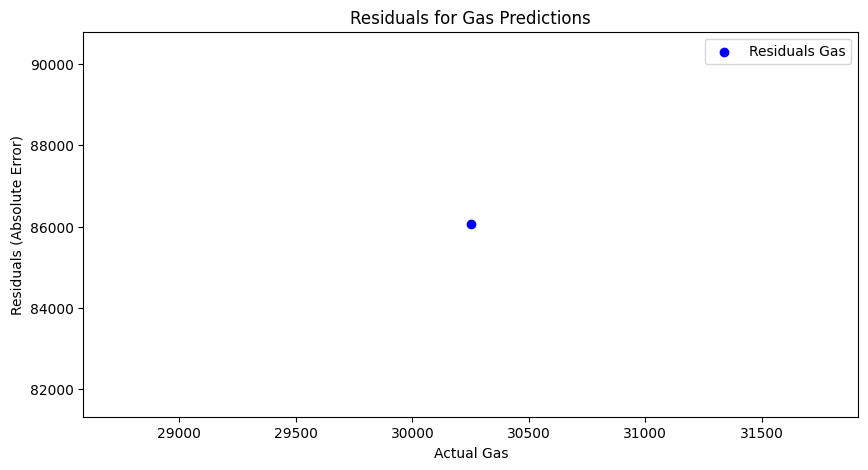

In [29]:
import numpy as np

# Calculate residuals for gas
residuals_gas = np.abs(y_test - predicted_gas)
# Calculate residuals for execution time
# residuals_execution = np.abs(y_test_execution - predicted_execution)

# Plot residuals for Gas
plt.figure(figsize=(10, 5))
plt.scatter(y_test, residuals_gas, color='blue', label='Residuals Gas')
plt.xlabel("Actual Gas")
plt.ylabel("Residuals (Absolute Error)")
plt.title("Residuals for Gas Predictions")
plt.legend()
plt.show()